In [1]:
# Change directory to the root folder of Dispa-SET:
import os
import sys
os.chdir('..')
import numpy as np
import pandas as pd
import datetime as dt
from dispaset.postprocessing import postprocessing as post
import importlib
importlib.reload(post)
%matplotlib inline
#Import Dispa-SET
import dispaset as ds
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import matplotlib.dates as mdates
#plt.style.use('seaborn-colorblind')
import pickle
import time as tm
import logging
import matplotlib


In [2]:
matplotlib.rcParams['figure.figsize'] = [16, 8]

In [3]:
# Load the configuration file
config = ds.load_config_excel('Simulations/ConfigKSA.xlsx')

[INFO    ] (load_config_excel): Using config file Simulations/ConfigKSA.xlsx to build the simulation environment
[INFO    ] (load_config_excel): Using /Users/abdullahalawad/Dropbox (MIT)/CCES/2017/Energy/Regional trade/UC&ED/dispaset/PycharmProjects/UC Model/Simulations/simulation_KSA as simulation folder


In [4]:
#AA = pd.read_csv('Database/GCCData/Load_RealTime/SA_EOA/2016.csv', header=None, skiprows=None, skipfooter=0, index_col=0,
                           parse_dates=True)
#AA.iloc[:,0]

IndentationError: unexpected indent (<ipython-input-4-40023a244d6a>, line 2)

In [5]:
# Build the simulation environment:
SimData, FuelPrices, FuelPrices2 = ds.build_simulation(config, LocalSubsidyMultiplier=1, ExportCostMultiplier=1)

[INFO    ] (build_simulation): New build started. DispaSET version: b'v2.3-9-g2ff8285'
[INFO    ] (NodeBasedTable): No data file found for the table LoadShedding. Using default value 0.0
[INFO    ] (NodeBasedTable): No data file found for the table CostLoadShedding. Using default value 1000.0
[INFO    ] (check_units): The columns "Nunits" is not present in the power plant database. A value of one will be assumed by default
[WARNING ] (build_simulation): No data file or default value found for PriceOfBlackCoal 2 in the zone SA_EOA. Assuming zero marginal price!
[INFO    ] (clustering): Clustered 114 original units into 94 new units
[INFO    ] (build_simulation): Time to cluster power plants: 7.268995761871338s
[WARNING ] (build_simulation): TimeUpMinimum in the power plant data has been rounded to the nearest integer value
[WARNING ] (build_simulation): TimeDownMinimum in the power plant data has been rounded to the nearest integer value
[INFO    ] (build_simulation): Scaling Storage Po

In [5]:
r = ds.solve_GAMS(config['SimulationDirectory'], config['GAMS_folder'])


[INFO    ] (solve_GAMS): Using the low-level gams api
[WARNING ] (get_gams_path): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS27.2/sysdir as GAMS path on this computer
[INFO    ] (solve_low_level): Completed simulation in 78.45 seconds


In [5]:
path = 'Simulations/simulation_KSA'
inputs,results = ds.get_sim_results(path=path,cache=True)
inputs1 = ds.ds_to_df(inputs)       #convert input data format into a dictionary of dataframes


[WARNING ] (get_gams_path): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS27.2/sysdir as GAMS path on this computer
[INFO    ] (gdx_to_list): Loading gdx file Simulations/simulation_KSA/Results.gdx took 0.029489994049072266s
[INFO    ] (gdx_to_dataframe): Time to convert to dataframes: 0.04024386405944824s


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


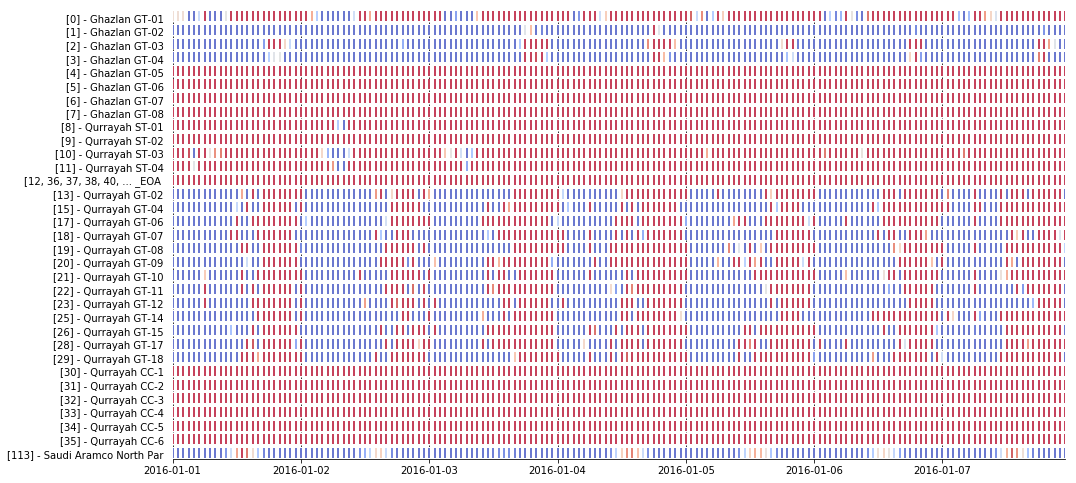

In [6]:
post.plot_rug(results['UnitOutputPower'], on_off=False, cmap='coolwarm')
#plt.savefig('../../../../../../../../../Desktop/UnitOutputPower_actual.png',dpi=300,tight_layout='tight_box')

In [7]:
config['Demand'] = '/Users/abdullahalawad/Dropbox (MIT)/CCES/2017/Energy/Regional trade/UC&ED/dispaset/PycharmProjects/UC Model/Database/GCCData/Load_RealTime/##/2016_F.csv'


In [8]:
# Build the simulation environment:
SimData, FuelPrices, FuelPrices2 = ds.build_simulation(config, LocalSubsidyMultiplier=1, ExportCostMultiplier=1)

[INFO    ] (build_simulation): New build started. DispaSET version: b'v2.3-9-g2ff8285'
[INFO    ] (NodeBasedTable): No data file found for the table LoadShedding. Using default value 0.0
[INFO    ] (NodeBasedTable): No data file found for the table CostLoadShedding. Using default value 1000.0
[INFO    ] (check_units): The columns "Nunits" is not present in the power plant database. A value of one will be assumed by default
[WARNING ] (build_simulation): No data file or default value found for PriceOfBlackCoal 2 in the zone SA_EOA. Assuming zero marginal price!


SA_EOA
168
SA_EOA
168
168
SA_EOA
SA_EOA
168
SA_EOA
168
168
SA_EOA
168
SA_EOA


[INFO    ] (clustering): Clustered 114 original units into 94 new units
[INFO    ] (build_simulation): Time to cluster power plants: 8.755815267562866s
[WARNING ] (build_simulation): TimeUpMinimum in the power plant data has been rounded to the nearest integer value
[WARNING ] (build_simulation): TimeDownMinimum in the power plant data has been rounded to the nearest integer value
[INFO    ] (build_simulation): Scaling Storage Power and Capacity by a factor 0.0
[WARNING ] (check_df): There are 2 missing entries in the column SA_EOA of the dataframe Load
[WARNING ] (get_gams_path): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS27.2/sysdir as GAMS path on this computer
[INFO    ] (write_variables): Data Successfully written to Inputs.gdx
[INFO    ] (build_simulation): Build finished


In [9]:
r = ds.solve_GAMS(config['SimulationDirectory'], config['GAMS_folder'])


[INFO    ] (solve_GAMS): Using the low-level gams api
[WARNING ] (get_gams_path): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS27.2/sysdir as GAMS path on this computer
[INFO    ] (solve_low_level): Completed simulation in 80.18 seconds


In [10]:
path = 'Simulations/simulation_KSA'
inputs2,results2 = ds.get_sim_results(path=path,cache=True)
inputs12 = ds.ds_to_df(inputs2)       #convert input data format into a dictionary of dataframes


[WARNING ] (get_gams_path): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS27.2/sysdir as GAMS path on this computer
[INFO    ] (gdx_to_list): Loading gdx file Simulations/simulation_KSA/Results.gdx took 0.021309852600097656s
[INFO    ] (gdx_to_dataframe): Time to convert to dataframes: 0.04624605178833008s


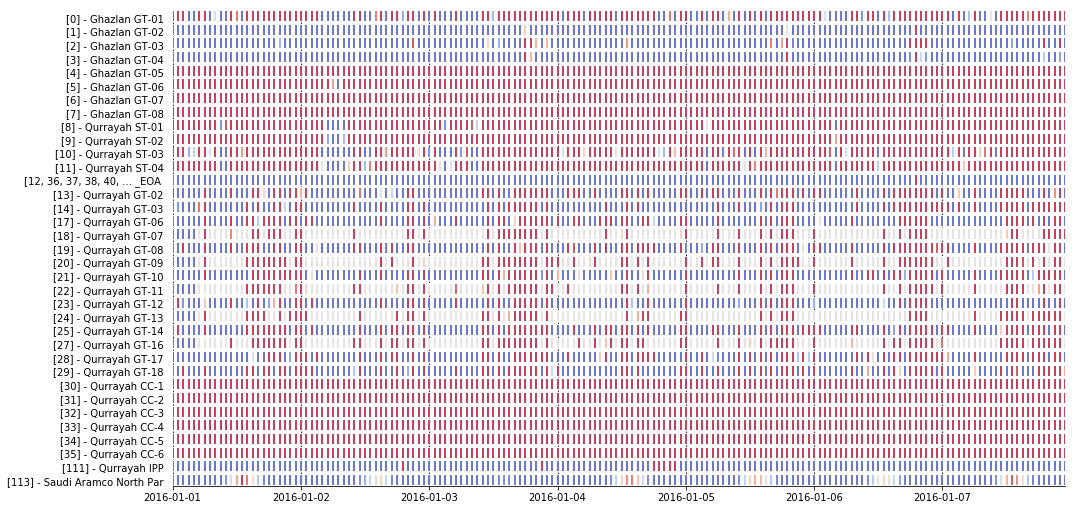

In [11]:
post.plot_rug(results2['UnitOutputPower'], on_off=False, cmap='coolwarm')
#plt.savefig('../../../../../../../../../Desktop/UnitOutputPower_forecasted.png',dpi=300,tight_layout='tight_box')

In [12]:
(inputs12['Demand'] - inputs1['Demand']).head()

,DA,2U,2D
,SA_EOA,SA_EOA,SA_EOA
2016-01-01 00:00:00,-55.46352,-78.617155,-39.308577
2016-01-01 01:00:00,-55.46352,-78.617155,-39.308577
2016-01-01 02:00:00,-55.46352,-78.617155,-39.308577
2016-01-01 03:00:00,-461.01355,-78.617155,-39.308577
2016-01-01 04:00:00,-95.76306,-78.617155,-39.308577


In [13]:
(inputs12['Demand']['DA']['SA_EOA'] - inputs1['Demand']['DA']['SA_EOA']).head()

2016-01-01 00:00:00    -55.46352
2016-01-01 01:00:00    -55.46352
2016-01-01 02:00:00    -55.46352
2016-01-01 03:00:00   -461.01355
2016-01-01 04:00:00    -95.76306
Freq: H, Name: SA_EOA, dtype: float64

In [14]:
results['UnitOutputPower'].sum(axis=1).head()

2016-01-01 00:00:00    11092.705
2016-01-01 01:00:00    11092.705
2016-01-01 02:00:00    11092.705
2016-01-01 03:00:00    10976.513
2016-01-01 04:00:00    10640.340
Freq: H, dtype: float64

In [15]:
inputs1['Demand'].head()

,DA,2U,2D
,SA_EOA,SA_EOA,SA_EOA
2016-01-01 00:00:00,11092.705,320.319041,160.15952
2016-01-01 01:00:00,11092.705,320.319041,160.15952
2016-01-01 02:00:00,11092.705,320.319041,160.15952
2016-01-01 03:00:00,10976.513,320.319041,160.15952
2016-01-01 04:00:00,10640.340,320.319041,160.15952


In [16]:
realdis = post.get_nodes_generation_cost(inputs, results)
realdis.head()

,SA_EOA
2016-01-01 00:00:00,73181.294321
2016-01-01 01:00:00,73181.294321
2016-01-01 02:00:00,73181.294321
2016-01-01 03:00:00,72258.454650
2016-01-01 04:00:00,69935.503867


In [17]:
foredis = post.get_nodes_generation_cost(inputs2, results2)
foredis.head()

,SA_EOA
2016-01-01 00:00:00,72732.163884
2016-01-01 01:00:00,72732.163884
2016-01-01 02:00:00,72732.163884
2016-01-01 03:00:00,68758.616734
2016-01-01 04:00:00,68959.751434


In [18]:
VOLL = 20

(array([-20000., -10000.,      0.,  10000.,  20000.,  30000.,  40000.,
         50000.,  60000.,  70000.]), <a list of 10 Text yticklabel objects>)

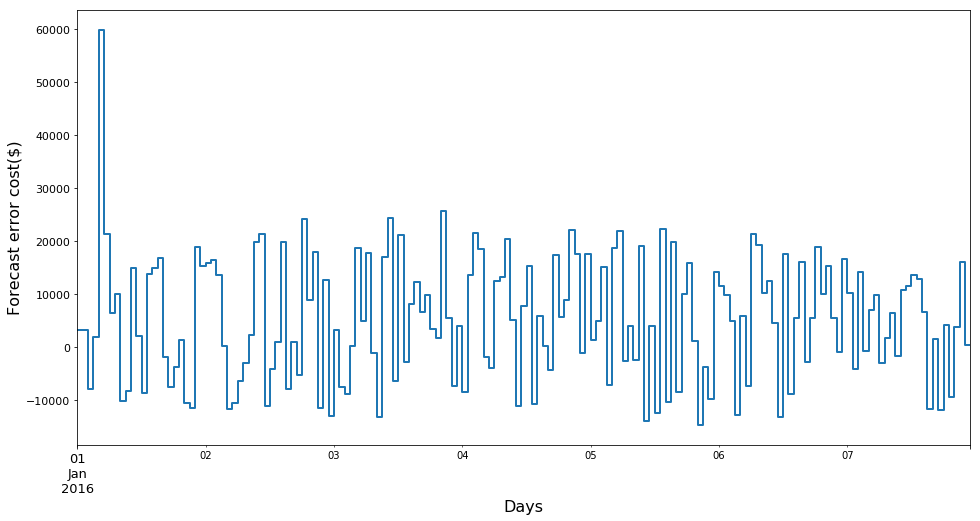

In [21]:
A = (foredis - realdis)['SA_EOA'] + VOLL*( inputs12['Demand']['2U']['SA_EOA'] + (inputs12['Demand']['DA']['SA_EOA'] - inputs1['Demand']['DA']['SA_EOA']) )
A.plot(drawstyle="steps", linewidth=2)
plt.xlabel("Days", fontsize=16)
plt.ylabel('Forecast error cost($)', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
#plt.savefig('../../../../../../../../../Desktop/Forecast error cost.png',dpi=300,tight_layout='tight_box')

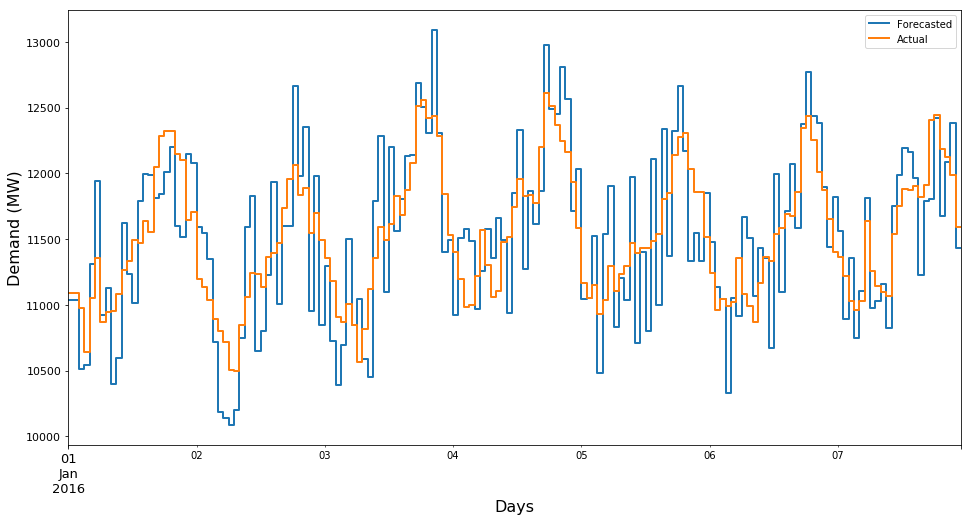

In [22]:
inputs12['Demand']['DA']['SA_EOA'].plot(drawstyle="steps", linewidth=2)
inputs1['Demand']['DA']['SA_EOA'].plot(drawstyle="steps", linewidth=2)
plt.xlabel("Days", fontsize=16)
plt.ylabel('Demand (MW)', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
plt.gca().legend(['Forecasted','Actual'])
#plt.savefig('../../../../../../../../../Desktop/Demand (MW).png',dpi=300,tight_layout='tight_box')

In [23]:
#DataFrame with startup times for each unit (1 for startup)
StartUps = results2['UnitCommitment'].copy()
for u in StartUps:
    values = StartUps.loc[:, u].values
    diff = -(np.roll(values, 1) - values )
    diff[diff <= 0] = 0
    StartUps[u] = diff

#DataFrame with shutdown times for each unit (1 for shutdown)
ShutDowns = results2['UnitCommitment'].copy()
for u in ShutDowns:
    values = ShutDowns.loc[:, u].values
    diff = (np.roll(values, 1) - values )
    diff[diff <= 0] = 0
    ShutDowns[u] = diff

#DataFrame with ramping up levels for each unit at each instant (0 for ramping-down & leveling out)
RampUps = results2['UnitOutputPower'].copy()
for u in RampUps:
    values = RampUps.loc[:, u].values
    diff = -(np.roll(values, 1) - values )
    diff[diff <= 0] = 0
    RampUps[u] = diff

#DataFrame with ramping down levels for each unit at each instant (0 for ramping-up & leveling out)
RampDowns = results2['UnitOutputPower'].copy()
for u in RampDowns:
    values = RampDowns.loc[:, u].values
    diff = (np.roll(values, 1) - values )
    diff[diff <= 0] = 0
    RampDowns[u] = diff

FixedCost = results2['UnitCommitment'].copy()
StartUpCost = results2['UnitCommitment'].copy()
ShutDownCost = results2['UnitCommitment'].copy()
RampUpCost = results2['UnitCommitment'].copy()
RampDownCost = results2['UnitCommitment'].copy()
VariableCost = results2['UnitCommitment'].copy()
UnitOperationCost = results2['UnitCommitment'].copy()

OperatedUnitList = results2['UnitCommitment'].columns
for u in OperatedUnitList:
    unit_indexNo = inputs2['units'].index.get_loc(u)
    FixedCost.loc[:,[u]] = np.array(results2['UnitCommitment'].loc[:,[u]])*inputs2['parameters']['CostFixed']['val'][unit_indexNo]
    StartUpCost.loc[:,[u]] = np.array(StartUps.loc[:,[u]])*inputs2['parameters']['CostStartUp']['val'][unit_indexNo]
    ShutDownCost.loc[:,[u]] = np.array(ShutDowns.loc[:,[u]])*inputs2['parameters']['CostShutDown']['val'][unit_indexNo]
    RampUpCost.loc[:,[u]] = np.array(RampUps.loc[:,[u]])*inputs2['parameters']['CostRampUp']['val'][unit_indexNo]
    RampDownCost.loc[:,[u]] = np.array(RampDowns.loc[:,[u]])*inputs2['parameters']['CostRampDown']['val'][unit_indexNo]
    VariableCost.loc[:,[u]] = np.array(inputs12['CostVariable'].loc[:,[u]])*np.array(results2['UnitOutputPower'][u]).reshape(-1,1)

UnitOperationCost = FixedCost+StartUpCost+ShutDownCost+RampUpCost+RampDownCost+VariableCost
UnitOperationCost['[18] - Qurrayah GT-07']



2016-01-01 00:00:00        0.000000
2016-01-01 01:00:00        0.000000
2016-01-01 02:00:00        0.000000
2016-01-01 03:00:00        0.000000
2016-01-01 04:00:00        0.000000
2016-01-01 05:00:00    10135.263408
2016-01-01 06:00:00     1083.727784
2016-01-01 07:00:00      561.932926
2016-01-01 08:00:00      561.932926
2016-01-01 09:00:00      561.932926
2016-01-01 10:00:00      561.932926
2016-01-01 11:00:00      937.508017
2016-01-01 12:00:00      561.932926
2016-01-01 13:00:00      561.932926
2016-01-01 14:00:00      561.932926
2016-01-01 15:00:00     1083.727784
2016-01-01 16:00:00     1083.727784
2016-01-01 17:00:00      561.932926
2016-01-01 18:00:00     1083.727784
2016-01-01 19:00:00     1083.727784
2016-01-01 20:00:00     1083.727784
2016-01-01 21:00:00      561.932926
2016-01-01 22:00:00      561.932926
2016-01-01 23:00:00     1083.727784
2016-01-02 00:00:00     1083.727784
2016-01-02 01:00:00      561.932926
2016-01-02 02:00:00      561.932926
2016-01-02 03:00:00      561